<a href="https://colab.research.google.com/github/freyal0811/CSE523-Machine-Learning-2022-Predictors_4.0/blob/main/2_Predictors_4_0_End_Sem_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

Loading data

In [ ]:
data = pd.read_csv('/content/data.csv', on_bad_lines='skip')

In [ ]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


Normalising data

Performing EDA:

In [ ]:
#Basic information

data.info()

#Describe the data

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [ ]:
#Find the duplicates

data.duplicated().sum()

0

In [ ]:
#unique values

data['strength'].unique()

array([1, 2, 0])

In [ ]:
# count of strengths or class value to be predicted
data['strength'].value_counts()

1    496801
0     89702
2     83137
Name: strength, dtype: int64

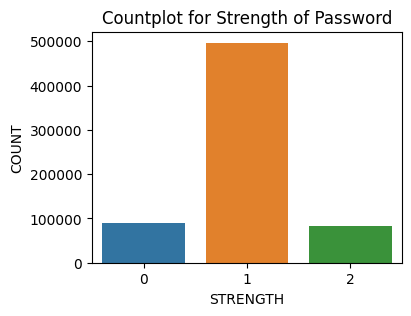

In [ ]:
# figure for strength
plt.figure(figsize=(4,3))
sns.countplot(x=data['strength'])
plt.title('Countplot for Strength of Password')
plt.xlabel('STRENGTH')
plt.ylabel('COUNT')
plt.savefig('strength.jpg')
plt.show()

In [ ]:
#Replace null values

data.replace(np.nan,'0',inplace = True)

#Check the changes now
data.isnull().sum()

password    0
strength    0
dtype: int64

In [ ]:
data.dtypes


password    object
strength     int64
dtype: object

Extracting Features

In [ ]:
#cleaning of the dataset
#extracting various password compositions from dataset

data.dropna(inplace=True)
data['length'] = data['password'].apply(len)
data['has_upper'] = data['password'].apply(lambda x: int(any(c.isupper() for c in x)))
data['has_lower'] = data['password'].apply(lambda x: int(any(c.islower() for c in x)))
data['has_digit'] = data['password'].apply(lambda x: int(any(c.isdigit() for c in x)))
data['has_specialchar'] = data['password'].apply(lambda x: int(any(not c.isalnum() for c in x)))
data['count_upper'] = data['password'].apply(lambda x: sum(1 for c in x if c.isupper()))
data['count_lower'] = data['password'].apply(lambda x: sum(1 for c in x if c.islower()))
data['count_digit'] = data['password'].apply(lambda x: sum(1 for c in x if c.isdigit()))
data['count_specialchar'] = data['password'].apply(lambda x: sum(1 for c in x if not c.isalnum()))

In [ ]:
X = np.hstack((np.ones((len(data), 1)), data[['length', 'has_upper','has_lower', 'has_digit','has_specialchar','count_upper','count_lower','count_digit','count_specialchar']].values))
y = data['strength'].values

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
data

,password,strength,length,has_upper,has_lower,has_digit,has_specialchar,count_upper,count_lower,count_digit,count_specialchar
0,kzde5577,1,8,0,1,1,0,0,4,4,0
1,kino3434,1,8,0,1,1,0,0,4,4,0
2,visi7k1yr,1,9,0,1,1,0,0,7,2,0
3,megzy123,1,8,0,1,1,0,0,5,3,0
4,lamborghin1,1,11,0,1,1,0,0,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
669635,10redtux10,1,10,0,1,1,0,0,6,4,0
669636,infrared1,1,9,0,1,1,0,0,8,1,0
669637,184520socram,1,12,0,1,1,0,0,6,6,0
669638,marken22a,1,9,0,1,1,0,0,7,2,0


In [ ]:
print(X.shape)

(669640, 10)


 Defining functions

In [ ]:
# define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# define the cost function
def cost_function(X, y, w):
    y_pred = sigmoid(X @ w)
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# define the gradient function
def gradient(X, y, w):
    y_pred = sigmoid(X @ w)
    grad = X.T @ (y_pred - y) / len(y)
    return grad




Initializing weights


In [ ]:
np.random.seed(0)
w = np.random.randn(X.shape[1])

Splitting test and train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Oversampling of dataset

In [ ]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({1: 397276, 0: 71869, 2: 66567})
After oversampling:  Counter({1: 397276, 0: 397276, 2: 397276})


Initiating parameters for traing the dataset 

In [ ]:
alpha = 0.1
num_iters = 1000

Training

In [ ]:
def train(X, y, alpha, num_iters):
    w = np.zeros(X.shape[1])
    for i in range(num_iters):
        grad = gradient(X, y, w)
        w -= alpha * grad
        cost = cost_function(X, y, w)
        if i % 100 == 0:
            print(f'Iteration {i}: cost = {cost}')
    return w
weights = train(X_train,y_train, alpha, num_iters)    
print(weights)

Iteration 0: cost = 0.6436357864136895
Iteration 100: cost = -0.0719982072125856
Iteration 200: cost = -0.22487190571565255
Iteration 300: cost = -0.3606200066499331
Iteration 400: cost = -0.4924766585454846
Iteration 500: cost = -0.6229505523549639
Iteration 600: cost = -0.7528051972808861
Iteration 700: cost = -0.8823386098552516
Iteration 800: cost = -1.0116878191151795
Iteration 900: cost = -1.1409236100737075
[ 0.          0.62438398 11.37436986  2.26979361  2.16028848  1.57822711
  0.90403387  0.24002652  0.62282317  0.13341262]


Testing

In [ ]:
def test(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    predictions = (h >= 0.8).astype(int)
    accuracy = np.mean(predictions == y)
    
    return accuracy
print(weights)    
acc = test(X_test,y_test,weights)    
print(acc)

[ 0.          0.62438398 11.37436986  2.26979361  2.16028848  1.57822711
  0.90403387  0.24002652  0.62282317  0.13341262]
0.7431231706588615


In [ ]:
# test the model on the data
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

y_pred = sigmoid(X_test @ weights)
y_pred = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.7431231706588615
Precision: 0.5522320467700794
Recall: 0.7431231706588615
F1 Score: 0.6336121922598826


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Checking for overfitting of the model:

In [ ]:
y_pred_test = sigmoid(X_test @ weights)
y_pred_train = sigmoid(X_train @ weights)
y_pred_test = np.round(y_pred_test)
y_pred_train = np.round(y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("accuracy on the training set:",accuracy_train)
print("accuracy on the testing set:",accuracy_test)

accuracy on the training set: 0.7415850307627979
accuracy on the testing set: 0.7431231706588615
